# **Project 6 - EDA**
## **Author:** Evan Dobler
## **Date:** 9/30/2024
## **Overview:** Create a custom exploratory data analysis (EDA) using a dataset of baseball data from 1999-2012.

In [174]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np 
import csv

## **Step 1:** Data Acquisition
**In this step:**
* Load the baseball.csv dataset into a DataFrame (df)

  * We do this by fetching the baseball.csv path of "*/Users/evandobler/Downloads/baseball.csv*"

In [175]:
# Load the athlete_pay.csv dataset into DataFrame
df = pd.read_csv('/Users/evandobler/Downloads/baseball.csv')
print(df.head())

  Team League  Year   RS   RA   W    OBP    SLG     BA  Playoffs  RankSeason  \
0  ARI     NL  2012  734  688  81  0.328  0.418  0.259         0         NaN   
1  ATL     NL  2012  700  600  94  0.320  0.389  0.247         1         4.0   
2  BAL     AL  2012  712  705  93  0.311  0.417  0.247         1         5.0   
3  BOS     AL  2012  734  806  69  0.315  0.415  0.260         0         NaN   
4  CHC     NL  2012  613  759  61  0.302  0.378  0.240         0         NaN   

   RankPlayoffs    G   OOBP   OSLG  
0           NaN  162  0.317  0.415  
1           5.0  162  0.306  0.378  
2           4.0  162  0.315  0.403  
3           NaN  162  0.331  0.428  
4           NaN  162  0.335  0.424  


* The results of the code above show the first few rows of data, to help us better understand the dataframe

## **Step 2:** Initial Data Inspeciton
**In this step:**
* Display first 10 rows of the DataFrame
* Check the shape of the DataFrame
* Display the data types 

In [176]:
# Return the first 10 rows of the DataFrame
print(df.head(10))

# Return the shape of the DataFrame
print(df.shape)

# Return the data types
print(df.dtypes)

  Team League  Year   RS   RA   W    OBP    SLG     BA  Playoffs  RankSeason  \
0  ARI     NL  2012  734  688  81  0.328  0.418  0.259         0         NaN   
1  ATL     NL  2012  700  600  94  0.320  0.389  0.247         1         4.0   
2  BAL     AL  2012  712  705  93  0.311  0.417  0.247         1         5.0   
3  BOS     AL  2012  734  806  69  0.315  0.415  0.260         0         NaN   
4  CHC     NL  2012  613  759  61  0.302  0.378  0.240         0         NaN   
5  CHW     AL  2012  748  676  85  0.318  0.422  0.255         0         NaN   
6  CIN     NL  2012  669  588  97  0.315  0.411  0.251         1         2.0   
7  CLE     AL  2012  667  845  68  0.324  0.381  0.251         0         NaN   
8  COL     NL  2012  758  890  64  0.330  0.436  0.274         0         NaN   
9  DET     AL  2012  726  670  88  0.335  0.422  0.268         1         6.0   

   RankPlayoffs    G   OOBP   OSLG  
0           NaN  162  0.317  0.415  
1           5.0  162  0.306  0.378  
2       

* The code above allows us to see the first 10 results from the dataset, along with each column and its respected data type (int64, float64, and object)

## **Step 3:** Initial Descriptive Statistics
**In this step:**
* Use describe() method to display summary statistics for each column

In [177]:
# Display Statistics 
print(df.describe())

              Year           RS           RA           W         OBP  \
count   420.000000   420.000000   420.000000  420.000000  420.000000   
mean   2005.500000   759.538095   759.538095   80.957143    0.332300   
std       4.035936    83.527087    87.636758   11.642162    0.014005   
min    1999.000000   513.000000   529.000000   43.000000    0.292000   
25%    2002.000000   706.000000   697.000000   72.000000    0.322000   
50%    2005.500000   752.500000   754.500000   81.000000    0.332000   
75%    2009.000000   813.000000   823.500000   90.000000    0.341000   
max    2012.000000  1009.000000  1028.000000  116.000000    0.373000   

              SLG          BA    Playoffs  RankSeason  RankPlayoffs  \
count  420.000000  420.000000  420.000000  114.000000    114.000000   
mean     0.419729    0.263638    0.271429    3.649123      3.157895   
std      0.026100    0.011584    0.445227    1.838538      1.077353   
min      0.339000    0.233000    0.000000    1.000000      1.000000

* df.describe() provides multiple insights from the dataset including mean, median, min, and max values

## **Step 4:** Initial Data Distribution for Numerical Columns 
**In this step:**
* Plot a histogram of a specific column (RS)
* Plot histograms of all columns 

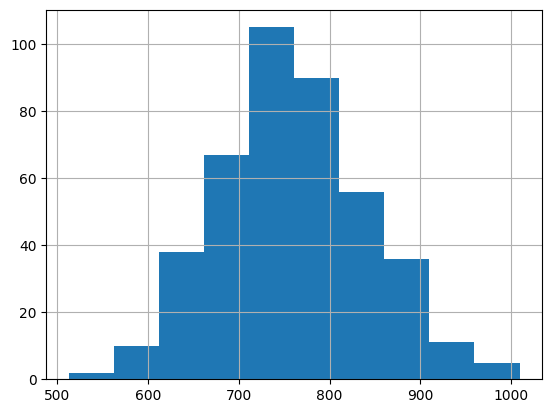

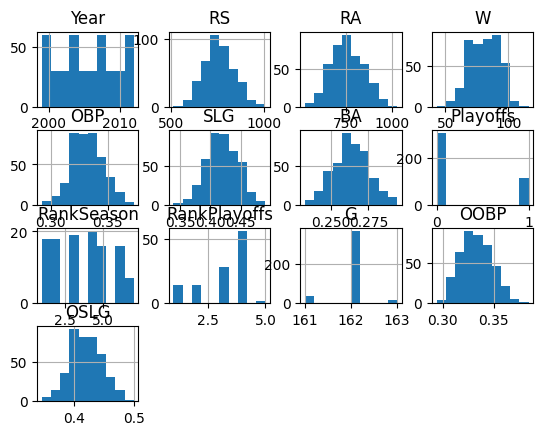

In [178]:
# Inspect histogram by 'earnings ($ million)' column
df['RS'].hist()

# Inspect histograms for all numerical columns
df.hist()

# Show all plots
plt.show()

* df['RS'].hist() creates a histogram for the column 'RS', showing total runs scored by teams from 1999-2012

* df.hist() shows all histograms for all numerical columns

* From the results listed in the histograms, you can see most of the statistics are normally distributed

## **Step 5:** Initial Data Distribution for Categorical Columns
**In this step:**
* Choose a categorical column
* Use df['coulumn_name'].value_counts() to display count of each category
* Use a loop to show value counts for all categorical columns 

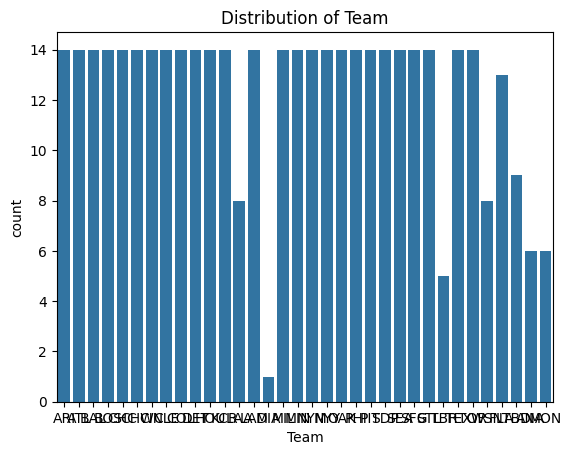

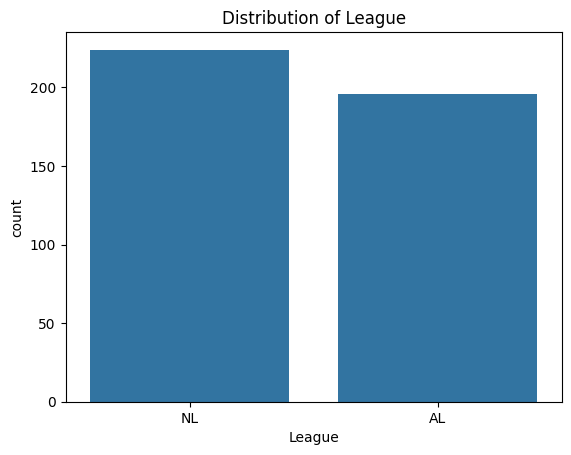

In [179]:
# Inspect value counts by categorical column
df['RA'].value_counts()

# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()

## **Step 6:** Initial Data Transformation and Feature Engineering 
**In this step:**
* Use pandas and other tools to perform transformations
* Transformations include: *renaming columns*, *adding new columns*, and *transforming existing data for more in-depth analysis*

In [180]:
# Renaming a column
df.rename(columns={'G': 'Games Played'}, inplace=True)

# Adding a new column
df['Run Differential'] = df['RS'] - df['RA']

df.rename() takes the "G" column and converts it to "Games Played" to make it easier to read
df['Run Differential'] is a new column that is calculated by subtracting 'RA' from 'RS'

## **Step 7:** Initial Visualizations
** In this step:**
* Create a variety of chart types to display multiple aspects of the data

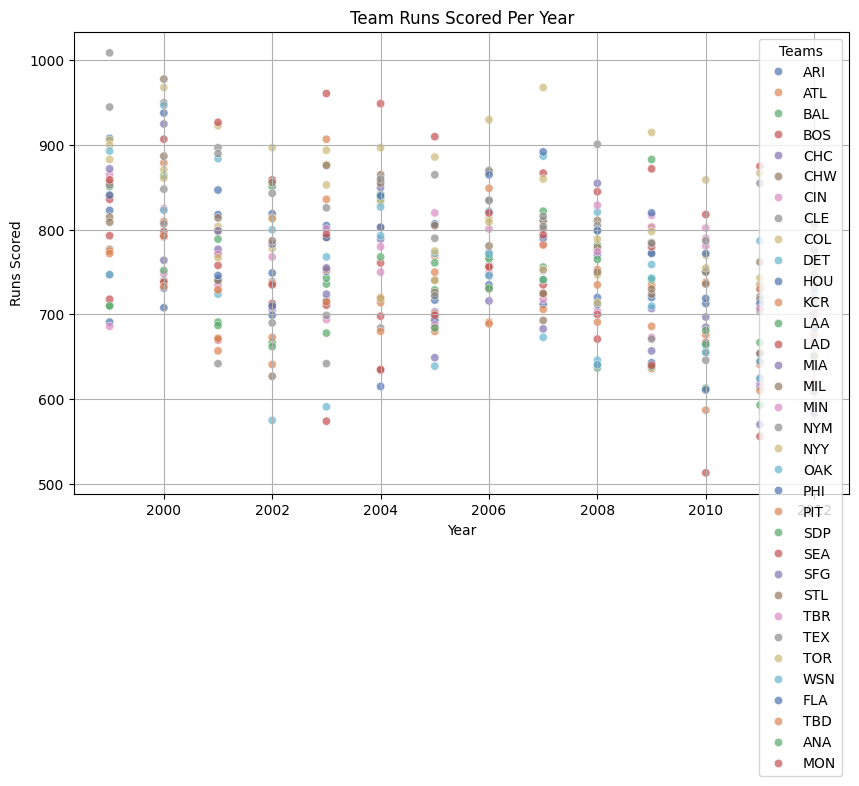

In [181]:
# Set up the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Year', y='RS', hue='Team', palette='deep', alpha=0.7)

# Customize the plot
plt.title('Team Runs Scored Per Year')
plt.xlabel('Year')
plt.ylabel('Runs Scored')
plt.legend(title='Teams')
plt.grid()

# Show the plot
plt.show()